https://segment-anything.com/

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics

# Clean up the notebook
clean_notebook()



Notebook cleaned.


# find class index

In [3]:
# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names (make sure these match your model or dataset)
class_names = model.names  # Typically COCO classes if using a pre-trained model

class_names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

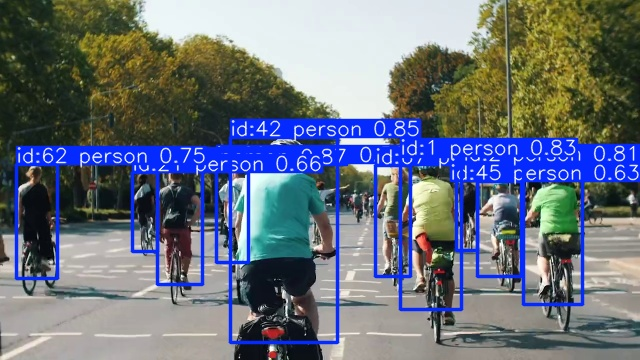

In [4]:
import cv2
from IPython.display import Image, display, clear_output
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names (make sure these match your model or dataset)
class_names = model.names  # Typically COCO classes if using a pre-trained model

# 2. Initialize VideoCapture
cap = cv2.VideoCapture('.././/Videos/video5.mp4')

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# 3. Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break  # video ended or can't read the frame
    
    # Optional: resize for faster processing or smaller display
    frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))
    
    # -- Inference + Tracking --
    # Here, we specify 'classes=[0]' to detect and track only the "person" class 
    # (assuming person is index 0 in your model's class list).
    results = model.track(
        source=frame, 
        conf=0.5,           # confidence threshold
        persist=True, 
        tracker='bytetrack.yaml',
        classes=[0],        # Track only person class
        verbose=False
    )
    
    # The model returns a list of Results; we take the first (and only) for a single image
    res = results[0]
    
    # -- Annotate the frame --
    annotated_frame = res.plot()
    
    # Convert the frame to JPEG format for display in Jupyter
    _, buffer = cv2.imencode('.jpg', annotated_frame)
    img_bytes = buffer.tobytes()

    # Display the frame in Jupyter Notebook
    display(Image(data=img_bytes))
    clear_output(wait=True)  # Clear previous output for smoother playback

cap.release()


# Tracking with Bounding box

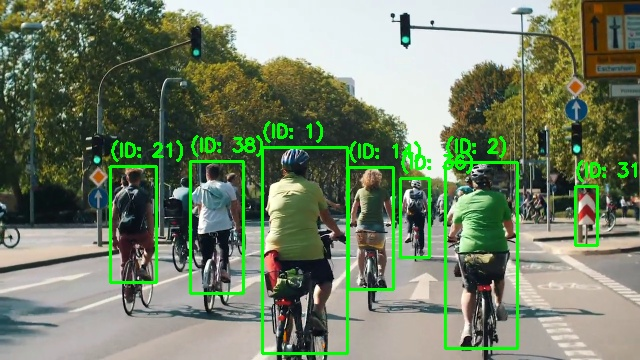

In [ ]:
import cv2
from IPython.display import Image, display, clear_output
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names
class_names = model.names  # If you have a custom dataset, this list may differ

# Initialize VideoCapture
cap = cv2.VideoCapture('.././/Videos/video5.mp4')
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break  # video ended or can't read the frame
    
    # Optional: downscale frame to speed up processing
    frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))
    
    # Run inference + tracking
    results = model.track(
        source=frame,
        conf=0.5,
        persist=True,
        tracker='bytetrack.yaml',
        classes=[0],       # Track only persons (class index 0, adjust if needed)
        verbose=False
    )
    res = results[0]
    
    # Extract bounding boxes + tracking IDs
    bboxes = res.boxes  # 'Boxes' object containing all detected boxes
    
    for box in bboxes:
        # box.xyxy: [x1, y1, x2, y2]
        # box.id: track ID (if present)
        # box.cls: class index
        # box.conf: confidence score
        
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]
        track_id = box.id  # may be None if the tracker didn't assign an ID
        
        # Convert class/conf to Python scalars
        class_id = int(box.cls[0].item())  
        confidence = float(box.conf[0].item())
        
        # Cast bounding box coords to int for drawing
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        
        # Draw bounding box
        color = (0, 255, 0)  # BGR
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        
        # Prepare the label
        class_name = class_names[class_id] if class_id < len(class_names) else "unknown"
        if track_id is not None:
            # Convert ID (tensor or float) to an integer/string
            try:
                track_id_val = int(track_id.item())  # for a Torch tensor
            except AttributeError:
                track_id_val = int(track_id)         # if it's already numeric
            label_text = f"(ID: {track_id_val})"
        else:
            label_text = class_name
        
        # Put label above bounding box
        cv2.putText(frame, label_text, (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    
    # Display the frame inside Jupyter
    _, buffer = cv2.imencode('.jpg', frame)
    img_bytes = buffer.tobytes()
    display(Image(data=img_bytes))
    clear_output(wait=True)

cap.release()


# Tracking with Segment

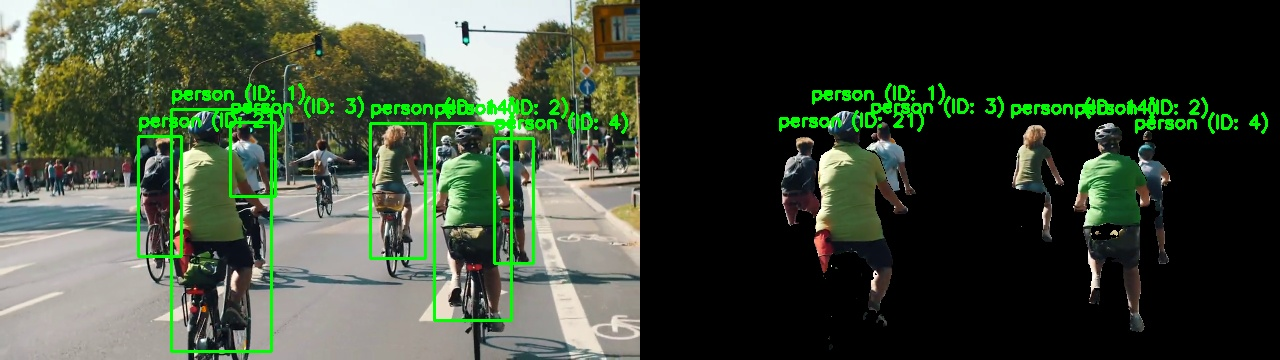

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display, clear_output
from ultralytics import YOLO, SAM

# ----------------------------
# Load YOLO (with tracking)
# ----------------------------
yolo_model = YOLO("yolo11n.pt")  # or your custom path
class_names = yolo_model.names

# ----------------------------
# Load SAM
# ----------------------------
sam_model = SAM('sam_b.pt')  # or your custom path

# ----------------------------
# Initialize video
# ----------------------------
cap = cv2.VideoCapture('.././/Videos/video5.mp4')
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Optional: resize for speed
    frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))

    # ----------------------------
    # 1) Run YOLO with ByteTrack
    # ----------------------------
    results = yolo_model.track(
        source=frame,
        conf=0.5,
        persist=True,
        tracker='bytetrack.yaml',
        classes=[0],     # track only 'person' class if desired
        verbose=False
    )
    
    res = results[0]
    boxes = res.boxes

    sam_bboxes = []
    tracked_info = []  # (x1, y1, x2, y2, track_id_val, class_id)

    # Collect bounding boxes + track IDs
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        track_id = box.id
        class_id = int(box.cls[0].item())
        
        if track_id is not None:
            try:
                track_id_val = int(track_id.item())  # torch tensor
            except AttributeError:
                track_id_val = int(track_id)
        else:
            track_id_val = -1

        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        sam_bboxes.append([x1, y1, x2, y2])
        tracked_info.append((x1, y1, x2, y2, track_id_val, class_id))

    # ----------------------------
    # 2) Run SAM on all bounding boxes
    # ----------------------------
    if sam_bboxes:
        # In newer ultralytics versions, pass 'source=' not 'image='
        sam_results_list = sam_model.predict(source=frame, bboxes=sam_bboxes, verbose=False)
        sam_results = sam_results_list[0]  # results for this frame
        all_masks = sam_results.masks.data  # list/array of boolean masks
    else:
        all_masks = []

    # -------------------------------------------
    # Make two copies of the frame
    #   left_frame  = bounding boxes + IDs
    #   right_frame = black background w/ objects
    # -------------------------------------------
    left_frame = frame.copy()
    # Start with a black image for the right side
    right_frame = np.zeros_like(frame)  

    # -------------------------------------------
    # 3) Combine all SAM masks into one big mask
    # -------------------------------------------
    if len(all_masks) > 0:
        # Create a single mask that marks every object pixel
        combined_mask = np.zeros((frame.shape[0], frame.shape[1]), dtype=bool)
        for mask in all_masks:
            mask_np = mask.cpu().numpy()  # bool array
            combined_mask |= mask_np

        # Copy *only* the object (mask) region from 'frame' to 'right_frame'
        right_frame[combined_mask] = frame[combined_mask]
    # else: right_frame remains all black

    # --------------------------------------------------
    # Draw bounding boxes & labels on both frames
    # --------------------------------------------------
    for i, (x1, y1, x2, y2, track_id_val, class_id) in enumerate(tracked_info):
        color = (0, 255, 0)
        class_name = class_names[class_id] if class_id < len(class_names) else "unknown"
        label_text = f"{class_name} (ID: {track_id_val})" if track_id_val >= 0 else class_name

        # LEFT FRAME: bounding box + ID
        cv2.rectangle(left_frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(left_frame, label_text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # RIGHT FRAME: bounding box + ID
        #cv2.rectangle(right_frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(right_frame, label_text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Combine left and right side by side
    combined = cv2.hconcat([left_frame, right_frame])

    # Show in Jupyter notebook
    _, buffer = cv2.imencode('.jpg', combined)
    display(Image(data=buffer.tobytes()))
    clear_output(wait=True)

cap.release()
